In [1]:
import numpy as np

In [2]:
import pandas as pd

In [97]:
from sklearn.datasets import make_moons

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [99]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [104]:
from sklearn.model_selection import cross_validate

In [4]:
from matplotlib import pyplot as plt

In [5]:
%matplotlib inline

In [27]:
import seaborn as sns

## 1. Make Dataset

In [56]:
n_obs = 1_000

In [57]:
X, y = make_moons(n_samples=n_obs, random_state=12345, noise=0.4)

In [65]:
X = pd.DataFrame(data=X, columns=["X1", "X2"])
y = pd.DataFrame(data=y, columns=["y"])

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

## 2. Quick EDA

### 2.1. Scatter Plot

In [68]:
fig_scatter = plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

In [69]:
ax_scatter = fig_scatter.add_subplot(1, 1, 1)

In [75]:
ax_scatter.scatter(x=X.loc[:, "X1"], y=X.loc[:, "X2"], c=y["y"])

In [76]:
ax_scatter.grid(True)

In [77]:
ax_scatter.set_xlabel("X1", size=15)
ax_scatter.set_ylabel("X2", size=15)

Text(0, 0.5, 'X2')

In [78]:
ax_scatter.set_title("Data Points - Scatter Plot", size=20)

Text(0.5, 1.0, 'Data Points - Scatter Plot')

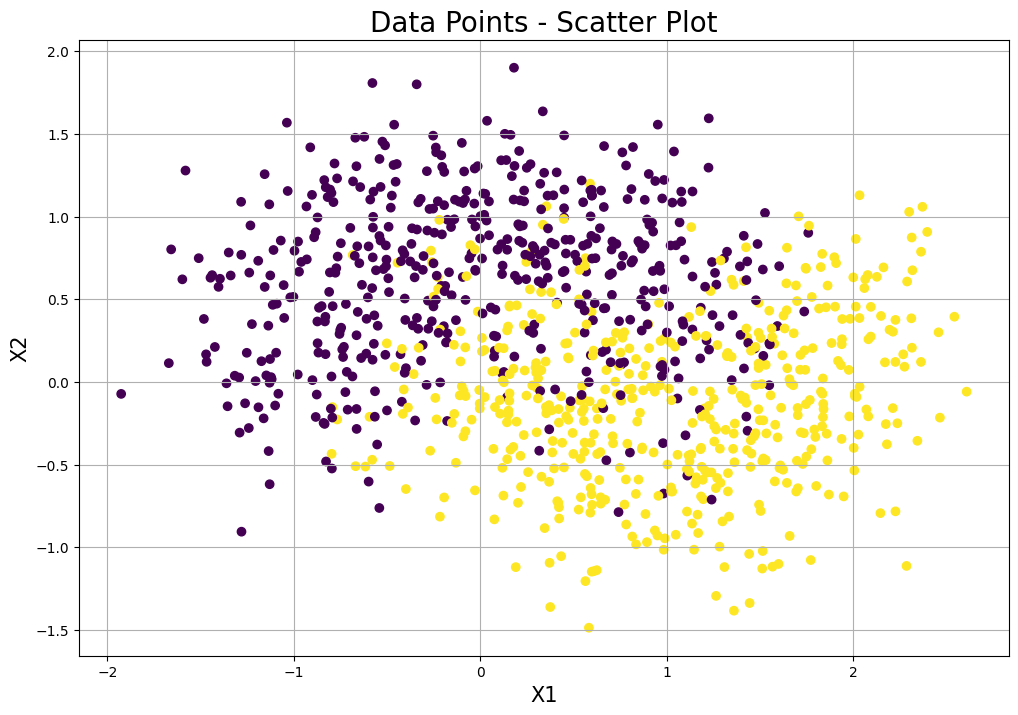

In [79]:
fig_scatter

### 2.2. One-dim Histograms

Text(0.5, 1.0, 'Histogram: X1')

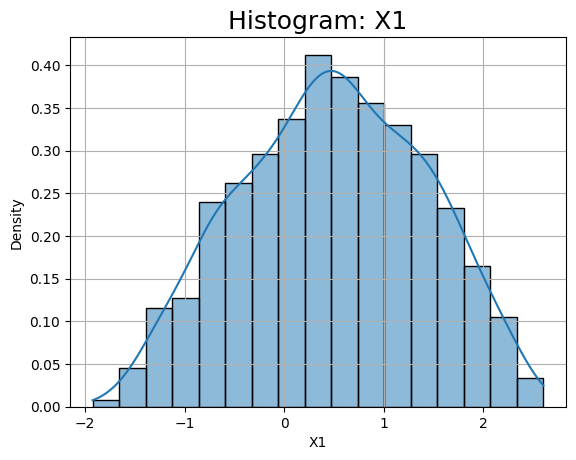

In [81]:
hist_x1 = sns.histplot(x=X.loc[:, "X1"], stat="density", kde=True)
hist_x1.grid(True)
hist_x1.set_title("Histogram: X1", size=18)

Text(0.5, 1.0, 'Histogram: X2')

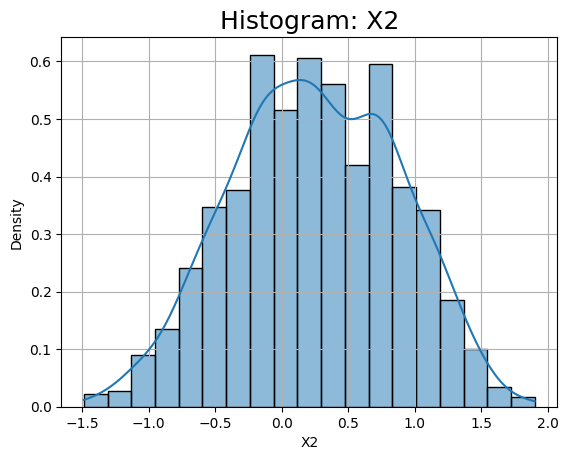

In [83]:
hist_x2 = sns.histplot(x=X.loc[:, "X2"], stat="density", kde=True)
hist_x2.grid(True)
hist_x2.set_title("Histogram: X2", size=18)

In [84]:
X = pd.DataFrame(data=X, columns=["X1", "X2"])
X = X.melt()

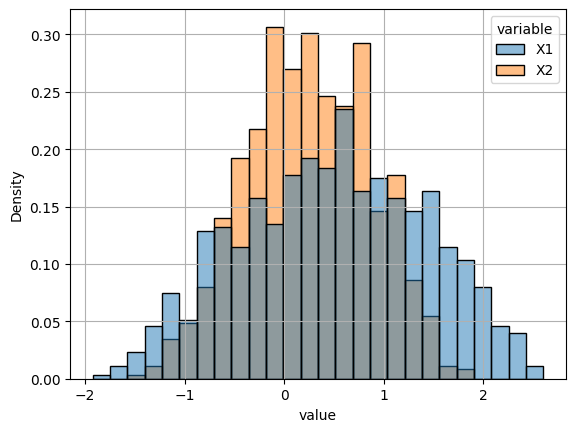

In [85]:
joint_histogram = sns.histplot(
    X,
    x="value",
    hue="variable",
    stat="density"
)
joint_histogram.grid(True)

## 3. Make Pipeline for Grid Search

### 3.1. Scaling

In [86]:
center_scaler = StandardScaler(with_mean=True, with_std=False)

### 3.2. Single Principal Component

In [87]:
pca_single_comp = PCA(n_components=1)

### 3.3. Add DecisionTree

In [89]:
decision_tree = DecisionTreeClassifier()

### 3.4. Make the Pipeline Instance

In [102]:
dt_pipeline = Pipeline(
    steps=[
        ("center_data", center_scaler),
        ("pca", pca_single_comp),
        ("dt_clf", decision_tree)
    ]
)

## 4. Run the Grid Search Cross-Validation

### 4.1. Define Grid of Parameters of the Pipeline to Search Over

In [103]:
hyperparams = {
    "dt_clf__criterion": ["gini", "entropy"],
    "dt_clf__max_depth": [1, 3, 5, 10, 20, None],
    "dt_clf__max_features": [5, 10, "sqrt", "log2", None]
}

### 4.2. Prepare Folds To Use in the Non-Nested Cross Validation

### 4.3. Run the GridSearchCV

## 5. Do the Non-Nested Cross-Validation 

## 6. Diagnose The Model